In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("augmented_data.csv")
# data = data[['national_number','primary_type','secondary_type']] 

bad = data['primary_type'] == data['secondary_type']
# data[]['secondary_type'] = pd.NA
data.loc[bad,'secondary_type'] = 'nan'

In [5]:
all_types = set()
cnts = {}
for r in data.iterrows():
    t1 = str(r[1]['primary_type'])
    t2 = str(r[1]['secondary_type'])
    all_types.add(t1)
    all_types.add(t2)
    if (t1,t2) not in cnts:
        cnts[(t1,t2)] =1
    else:
        cnts[(t1,t2)] +=1

all_types = sorted(all_types)
all_types.remove('nan')
all_types += ['nan']
# cnts
all_types
    

['bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water',
 'nan']

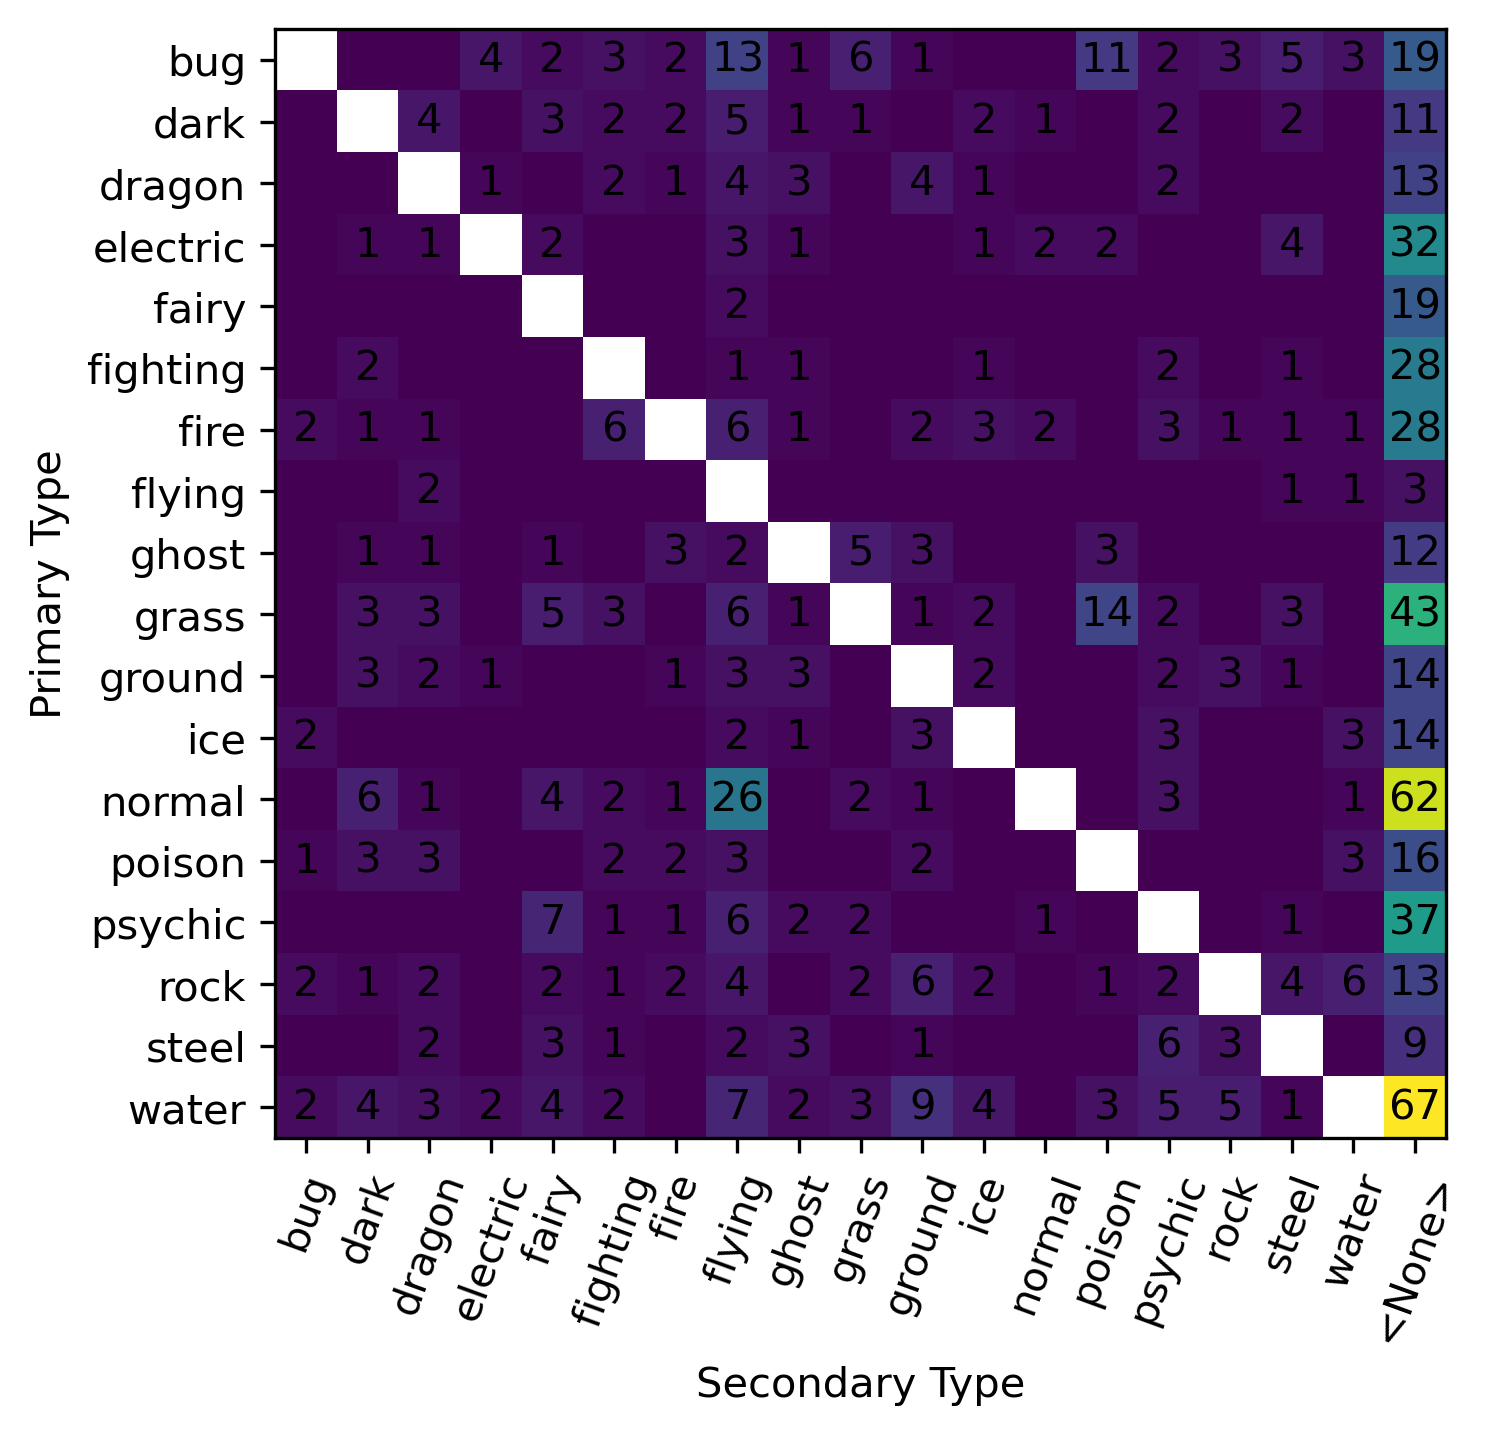

In [8]:
plt.rcParams['figure.dpi'] = 300  # Set desired DPI (e.g., 300)
# You can also adjust figure size if needed
# plt.rcParams['figure.figsize'] = (width, height) 

mat = np.zeros((18,19))
for key in cnts:
    key1 = all_types.index(key[0])
    key2 = all_types.index(key[1])
    mat[key1][key2] = cnts[key]

for i in range(18):
    mat[i][i] = np.nan



plt.imshow(mat,cmap="viridis")

plt.ylabel("Primary Type")
plt.xlabel("Secondary Type")


plt.yticks(range(18),all_types[:-1])
plt.xticks(range(19),all_types[:-1] + ['<None>'], rotation=70)

for (j,i),label in np.ndenumerate(mat):
    if mat[j,i] > 0:
        plt.text(i,j,int(label),ha='center',va='center')

# plt.xticks(ticks)

In [81]:
data[(data['primary_type'] == "normal") & (data['secondary_type'] == "ghost")]

,Unnamed: 0,national_number,gen,english_name,japanese_name,classification,primary_type,secondary_type,description,col_name,egg_group,color,habitat,shape


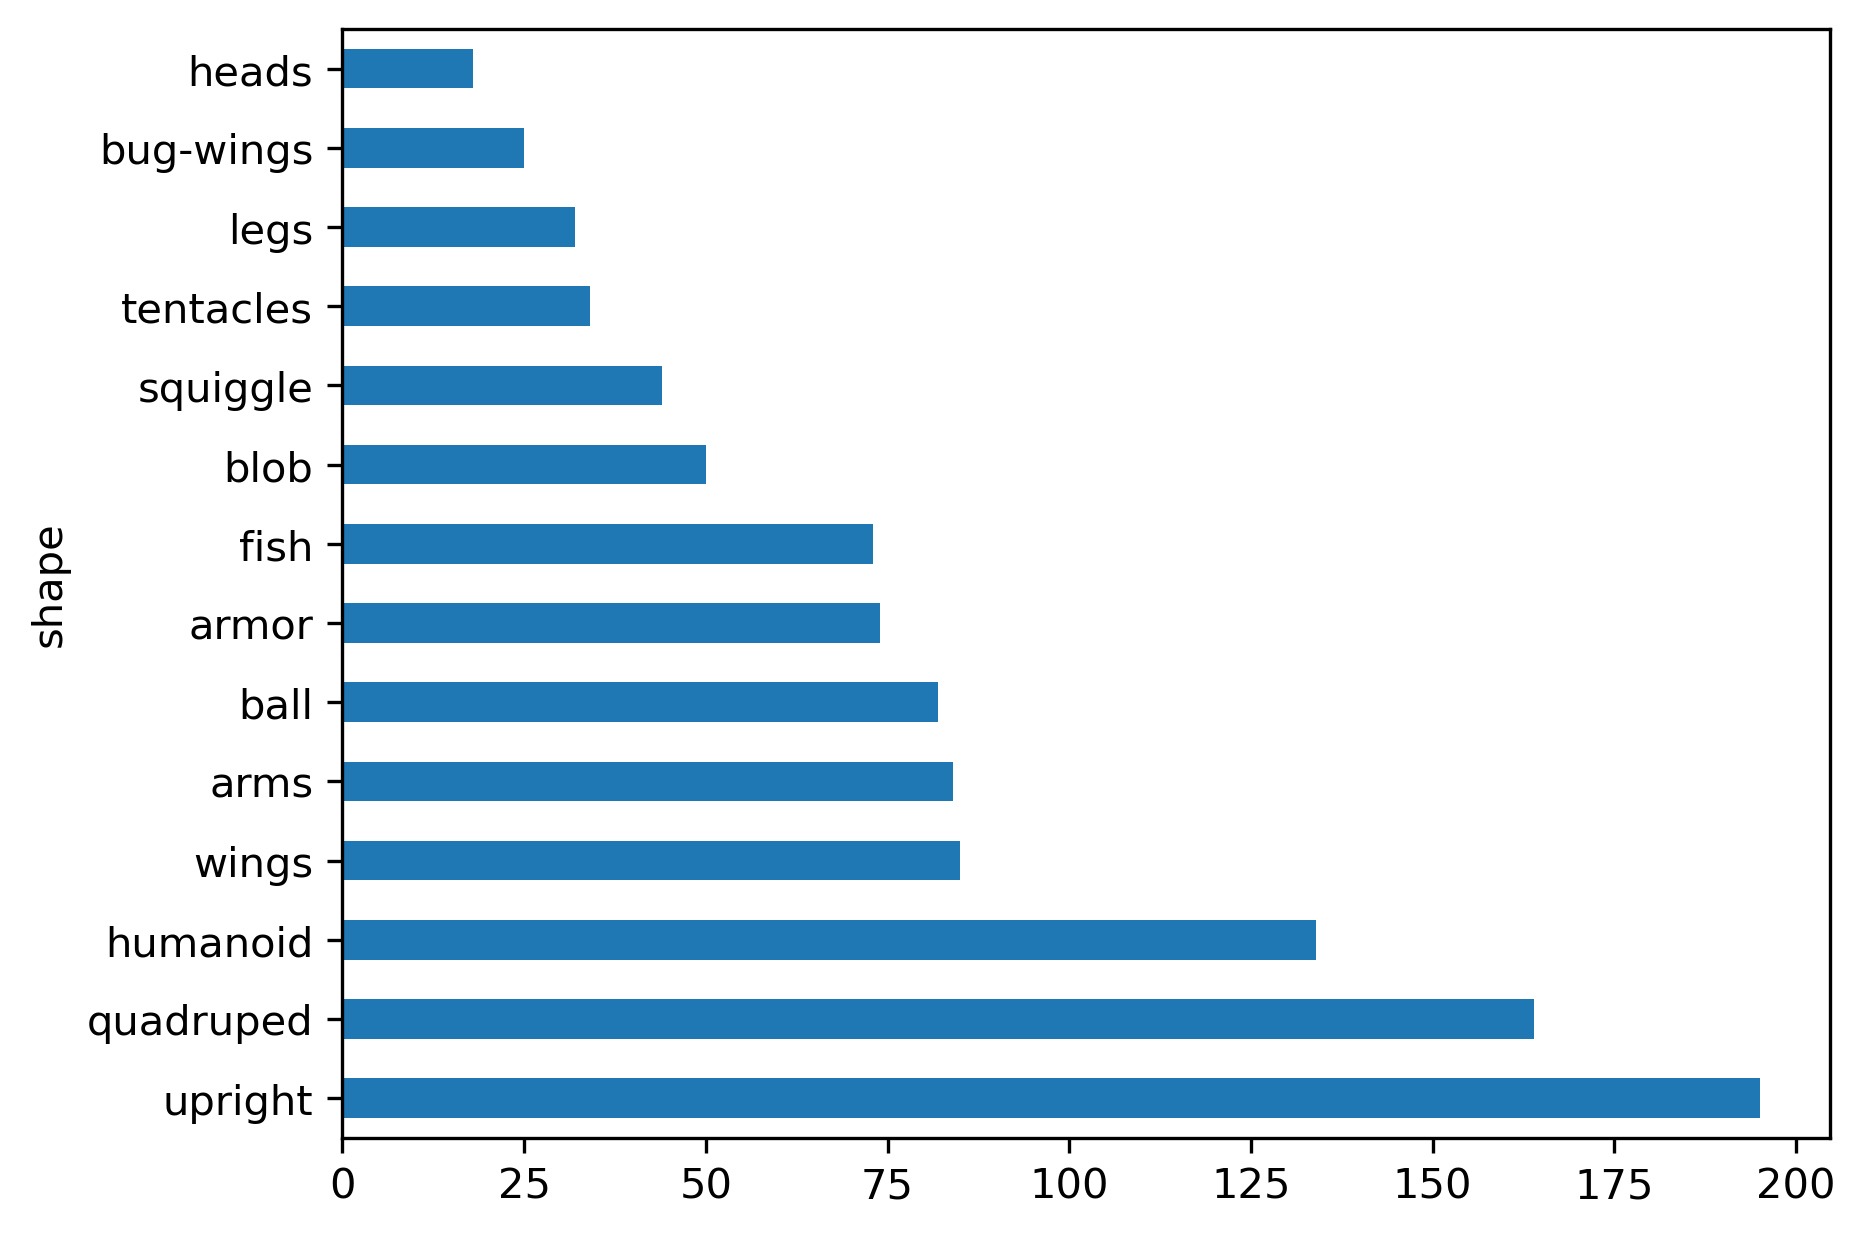

In [17]:
ax1 = data['egg_group'].value_counts().plot(kind='barh')
ax2 = data['color'].value_counts().plot(kind='barh')
ax3 = data['habitat'].value_counts().plot(kind='barh')
ax4 = data['shape'].value_counts().plot(kind='barh')

AttributeError: 'Axes' object has no attribute 'show'

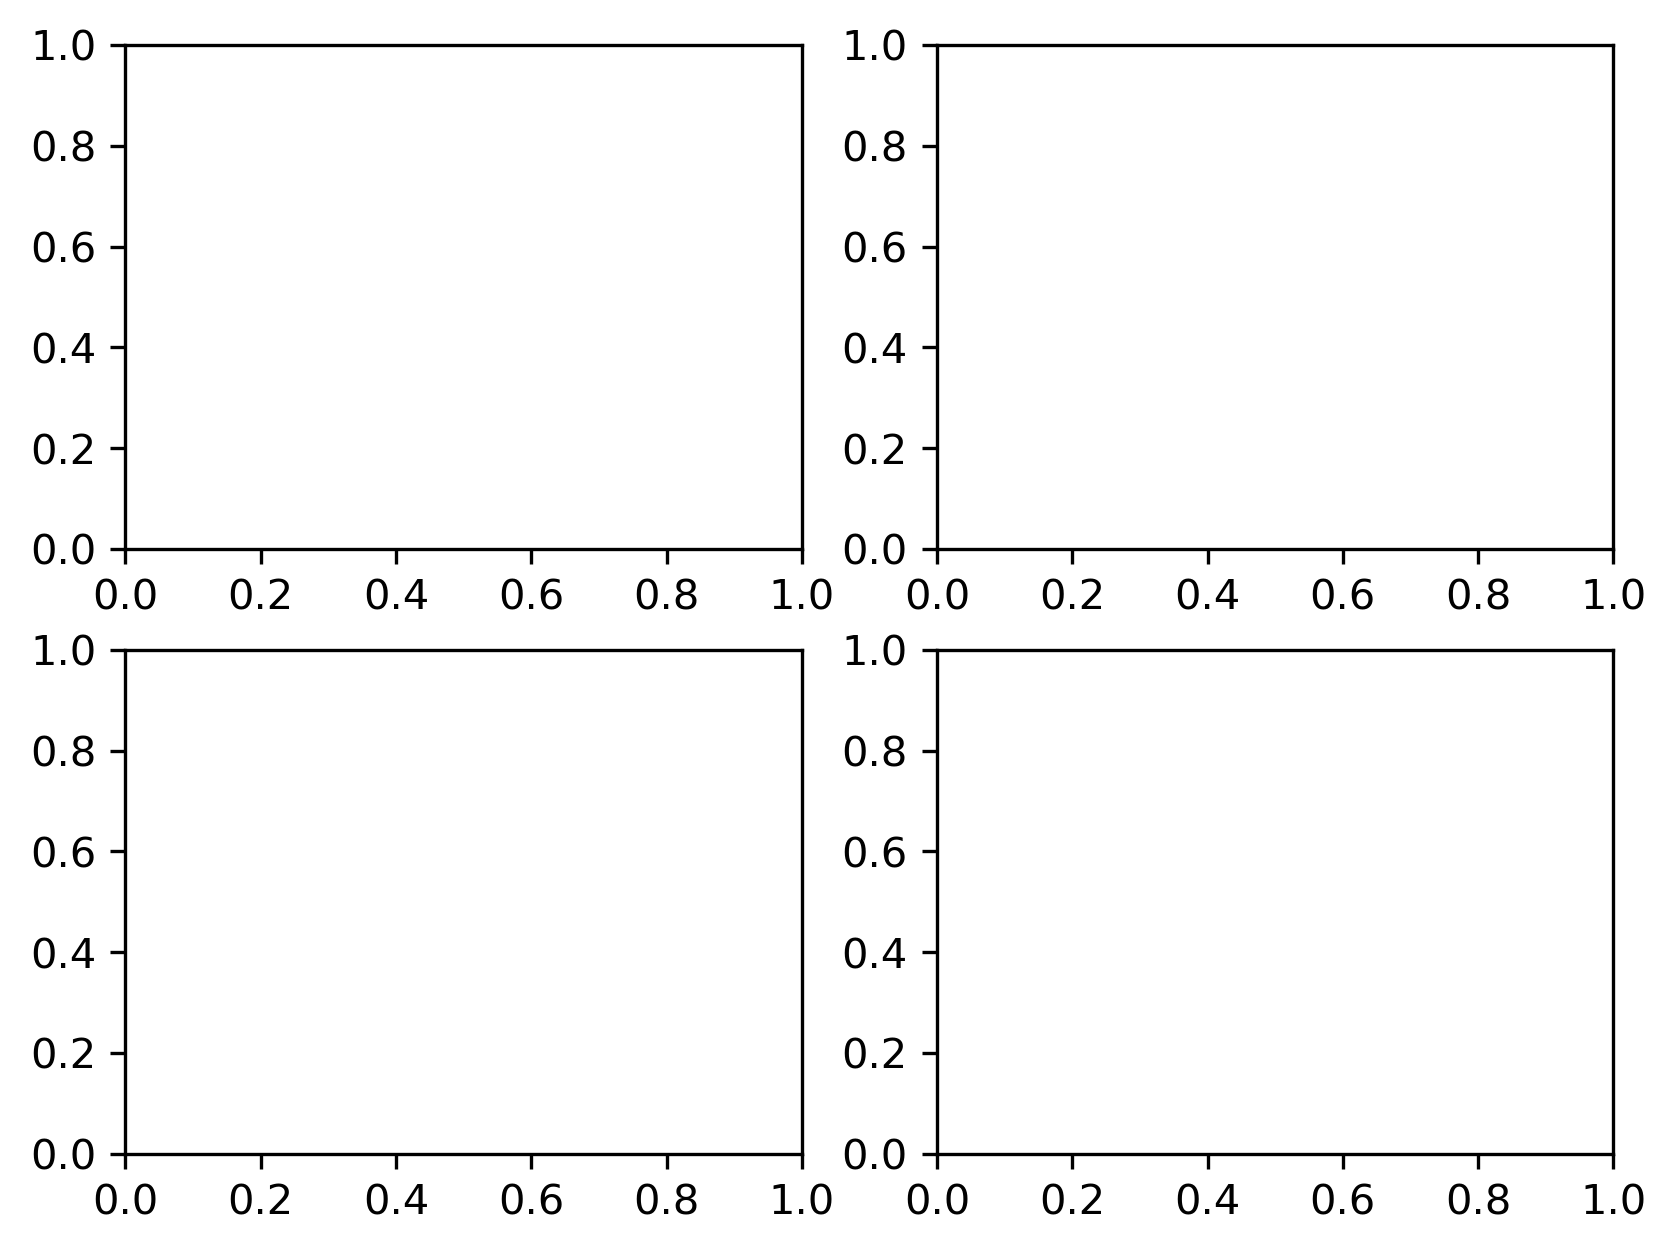

In [19]:
fig, axs = plt.subplots(2, 2)
axs[0,0] = ax1.show()



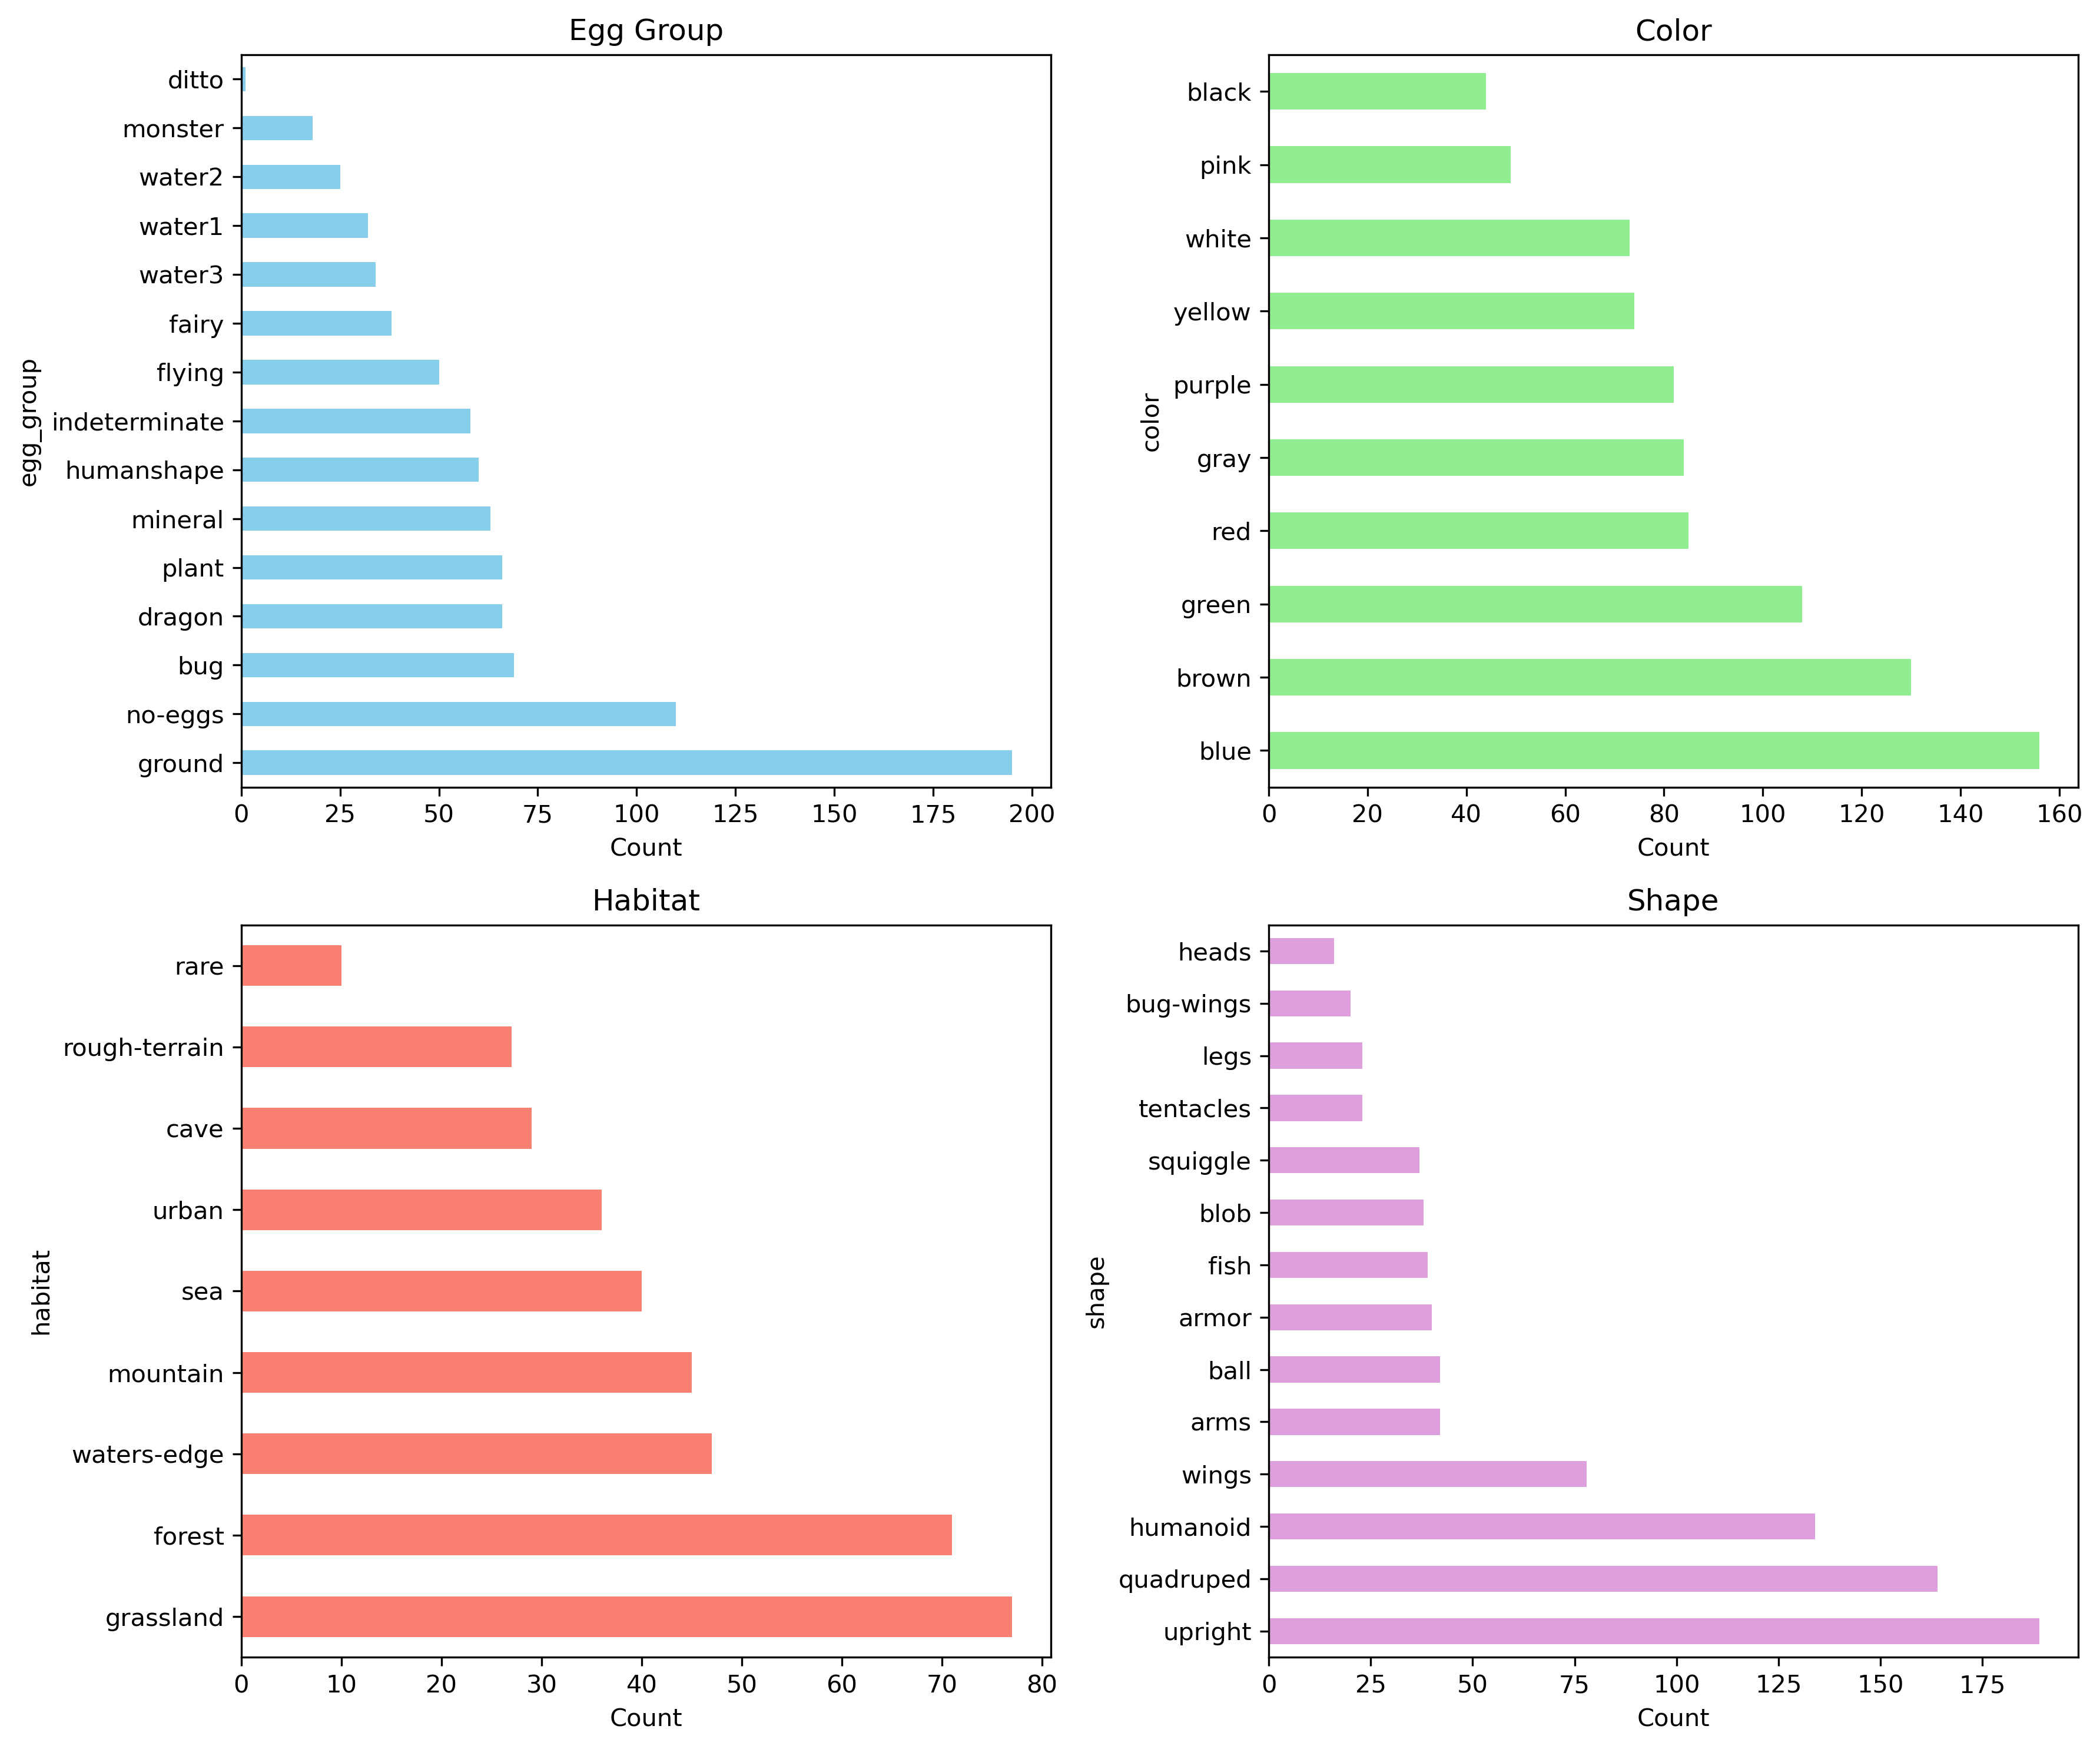

In [24]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each value_counts() barh on its own axis
data['egg_group'].value_counts().plot(kind='barh', ax=axes[0, 0], color='skyblue', title='Egg Group', xlabel="Count")
data['color'].value_counts().plot(kind='barh', ax=axes[0, 1], color='lightgreen', title='Color', xlabel="Count")
data['habitat'].value_counts().plot(kind='barh', ax=axes[1, 0], color='salmon', title='Habitat', xlabel="Count")
data['shape'].value_counts().plot(kind='barh', ax=axes[1, 1], color='plum', title='Shape', xlabel="Count")

# Adjust layout so titles and labels don’t overlap
plt.tight_layout()
plt.show()


In [29]:
data.isnull().sum(axis = 0)

Unnamed: 0           0
national_number      0
gen                  0
english_name         0
japanese_name        0
classification       0
primary_type         0
secondary_type     429
description          0
col_name           898
egg_group           13
color               13
habitat            516
shape               13
dtype: int64